# Определение закономерностей успешности компьютерной игры для магазина "Стримчик"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г. и необходимо спланировать кампанию на 2017-й.

## Изучение данных из файла


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board. Ассоциация, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию).

Для исследования дполнительно нам понадобится описание рейтинга ESRB:

- «EC» («Early childhood») — для детей младшего возраста
- «E» («Everyone») — для всех от 6 лет. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — для всех от 10 лет и старше
- «T» («Teen») — для подростков от 13 лет
- «M» («Mature») — для взрослых от 17 лет
- «AO» («Adults Only 18+») — только для взрослых старше 18 лет
- «RP» («Rating Pending») — рейтинг ожидается (продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу)

**Вывод:**

Файл содержит 16715 записей, каждая запись соответствует компьютерной игре и данным по ней. Данные предствалены за разные годы, начиная с 1980.
В столбцах есть пропуски, встречаются аномальные значения ("tbd" в User_Score).
Типы данных в некоторых столбцах требуют преобразования. 
Название столбцов необходимо будет привести к нижнему регистру.

## Предобработка данных

### Переименование столбцов и обработка пропусков

Приведем название всех столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим на долю пропусков

In [7]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Для оценок критиков, пользователей, а также рейтинга от ассоциации ESRB приходится большая доля пропусков, около половины записей. Также много пропусков для года релиза, и незначительное количество для названия игры и жанра.

Приступим к заполнению пропусков в оценках критиков. Сгруппируем данные по жанру и определим медиану для оценки критиков по каждому жанру

In [8]:
med_critic_score = df.groupby('genre')['critic_score'].transform('median')

Заменим пропуски медианой

In [9]:
df['critic_score'] = df['critic_score'].fillna(med_critic_score)

Тоже самое сделаем для оценки пользователей, но сначала необходимо преобразовать строковый тип данных к числовому.
Кроме того в столбце с рейтингом пользователей user_score присутствует значение tbd, что означает "To Be Determined" (будет определено). Посмотрим на долю таких записей

In [10]:
df[df['user_score'] == "tbd"]['user_score'].count() / len(df)

0.1450194436135208

In [11]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,75.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,75.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,70.0,tbd,E


tbd можно считать пропуском, т.к. данные о рейтинге неизвестны. Поэтому при преобразовании строковых значений к числовому применим errors='coerce', котрый заменит tbd на NaN

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Теперь определим медиану для оценки пользователей по каждому жанру

In [13]:
med_user_score = df.groupby('genre')['user_score'].transform('median')

И заполним пропуски медианой

In [14]:
df['user_score'] = df['user_score'].fillna(med_user_score)

Посмотрим пропуски и уникальные значения в столбце с рейтингом ESRB

In [15]:
df['rating'].isna().mean()

0.4047861202512713

In [16]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Рейтинг K-A (Kids to Adults) это первоначальное значение рейтинга E (Everyone), поэтому заменим значение на E

In [17]:
df['rating'] = df['rating'].replace('K-A', 'E')

Рейтинг RP (Rating Pending) означает, что ожидается присвоение рейтинга ассоциацией ESRB. Таких значений в таблице 3. Кроме того, в столбце есть пропуски и можно предположить, что это игры, ожидающие присвоения рейтинга. Посмотрим на эти записи с рейтингом RP.

In [18]:
df.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,7.4,RP


Заменим пропуски в столбце "raiting" на RP

In [19]:
df['rating'] = df['rating'].fillna('RP')

In [20]:
df.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,RP
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,RP
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,RP
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,RP
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,7.5,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,RP
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,7.4,RP
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,RP
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,7.7,RP


Посмотрим на долю пропусков для года релиза

In [21]:
df['year_of_release'].isna().mean()

0.01609332934489979

Чтобы не удалять эти записи и не потерять данные для анализа, заполним их медианой для года, характерного для платформы и жанра. 

In [22]:
med_year = df.groupby(['platform','genre'])['year_of_release'].transform('median')  

In [23]:
df['year_of_release'] = df['year_of_release'].fillna(med_year)

Посмотрим на текущее состояние пропусков

In [24]:
df.isna().mean()

name               0.00012
platform           0.00000
year_of_release    0.00000
genre              0.00012
na_sales           0.00000
eu_sales           0.00000
jp_sales           0.00000
other_sales        0.00000
critic_score       0.00012
user_score         0.00012
rating             0.00000
dtype: float64

Оставшиеся пропуски заполним нулями - это очень маленькое количество записей, у которых отсутствует название игры и жанр (и соотвественно не удалось заполнить оценки критиков и пользователей)

In [25]:
df = df.fillna(0)

Посмотрим на записи, у которых нет названия игры и жанра - это одни и те же две строки.

In [26]:
df.query('name == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,0,1.78,0.53,0.00,0.08,0.0,0.0,RP
14244,0,GEN,1993.0,0,0.00,0.00,0.03,0.00,0.0,0.0,RP


In [27]:
df.query('genre == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,0,1.78,0.53,0.00,0.08,0.0,0.0,RP
14244,0,GEN,1993.0,0,0.00,0.00,0.03,0.00,0.0,0.0,RP


Удалим эти записи, т.к. их доля очень маленькая и не повлияет на выводы, в т.ч. данные относятся к 1993 и не потребуются для планирования кампании на 2017 год. Кроме того, для анализа по жанрам эти 2 записи будут давать выбивающуюся категорию 0

In [28]:
df.drop(df[df['name'] == 0].index, inplace=True)

После удаления строк обновим индексы

In [29]:
df = df.reset_index(drop = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Замена типа данных

In [31]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,RP


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Преобразуем год выпуска игры к типу int

In [33]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,RP


После всех преобразований еще раз посмотрим на типы данных в таблице

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Проверка на дубликаты

Проверим наличие полных дубликатов в нашей таблице

In [36]:
df.duplicated().sum()

0

Дополнительно проверим нет ли одинаковых жанров, отличающихся из-за разного написания

In [37]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Одинаковых жанров не обнаружено, но приведем названия жанров к нижнему регистру и избавимся от "-" в названии жанра "Role-Playing"

In [38]:
df['genre'] = df['genre'].replace('Role-Playing', 'Role_Playing')

In [39]:
df['genre'] = df['genre'].str.lower()

In [40]:
df['genre'].value_counts()

action          3369
sports          2348
misc            1750
role_playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

Полные дубликаты не обнаружены.  В таблице присутствуют данные по 12 разным жанрам

### Подсчет суммарных продаж во всех регионах

Добавим столбец с суммарным количеством проданных млн копий для каждой игры

In [41]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,69.0,7.7,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


Посмотрим, есть ли записи, у которых отсутствуют данные о продажах

In [42]:
df.query('sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16674,G1 Jockey 4 2008,PS3,2008,sports,0.0,0.0,0.0,0.0,75.0,7.4,RP,0.0
16707,SCORE International Baja 1000: The Official Game,PS2,2008,racing,0.0,0.0,0.0,0.0,69.0,7.4,RP,0.0


Заполним пропуск в суммарном количестве продаж медианой по жанрам

In [43]:
med_sales = df.groupby(['genre', 'year_of_release'])['sales'].transform('median')                      

In [44]:
for i in med_sales.index:

    df.loc[(df['sales'] == 0)] = med_sales[i]

Посмотрим на максимальное значение по глобальным продажам

In [45]:
df['sales'].max()

82.53999999999999

In [46]:
df.query('sales > 80')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Значение не является аномальным, данные достоверны. По информации Википедии игра Wii Sports стала рекордсменом по количеству наград от Премии Британской Академии в области видеоигр 2007г, это объясняет высокие продажи. 

**Вывод:**
Мы подготовили данные для анализа, заполнили пропуски, привели название столбцов к нижнему регистру. 

Удалили 2 записи с годом выпуска игры - 1993, по которым нельзя установить жанр.

Пропуски в оценках пользователей и критиков заполнены медианой по жанрам.

Пропуски в рейтинге ESRB заполенены RP - рейтинг ожидается. 

Данные о продажах оставили в формате вещественных числел с двумя знаками после запятой, чтобы при округлении не потерять данные, т.к. они представлены в млн копий. Для двух записей, у которых полностью отсутствуют данные о продажах, но при этом есть оценки пользователей, мы заполнили суммарные продажи медианой по жанру и году. 

Данные об оценках критиков и пользователей, аналогично продажам, оставили в формате вещественных числел.

Пропуски для года релиза мы заполнили медианой по платформе и жанру. Т.к. можем предположить, что каждой платформе характерен свой временной промежуток, а для большей достоверности при расчете медианы добавили группировку по жанрам. 

## Исследовательский анализ данных

### Количество игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы

In [47]:
games_per_year = df.groupby('year_of_release')['year_of_release'].count()
games_per_year

year_of_release
0.165          2
1980.000      10
1981.000      50
1982.000      47
1983.000      18
1984.000      14
1985.000      14
1986.000      21
1987.000      16
1988.000      15
1989.000      17
1990.000      16
1991.000      41
1992.000      43
1993.000      60
1994.000     121
1995.000     220
1996.000     263
1997.000     289
1998.000     387
1999.000     339
2000.000     351
2001.000     482
2002.000     830
2003.000     804
2004.000     797
2005.000     950
2006.000    1010
2007.000    1200
2008.000    1469
2009.000    1466
2010.000    1299
2011.000    1155
2012.000     658
2013.000     548
2014.000     583
2015.000     606
2016.000     502
Name: year_of_release, dtype: int64

Для полученных данных построим гистограмму

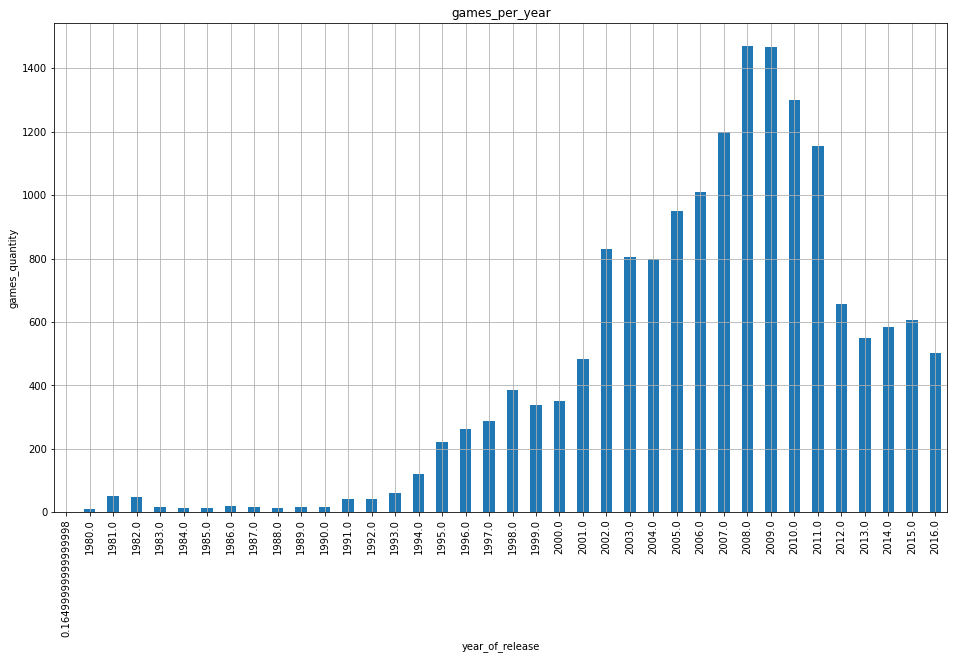

In [48]:
games_per_year.plot(kind = 'bar',  grid = True, title='games_per_year', figsize=(16,9))
plt.ylabel('games_quantity');

**Вывод:**
Данные представлены за период с 1980 по 2016 год. Первые 10 лет, с 1980 до 1990 количество выпускаемых в год игр было маленьким, около 10-20 игр. В 1981-1982 был небольшой всплеск примерно до 50 игр в год.
Начиная с 1991 наблюдается рост выпуска игр. Пик приходится на 2008-2009 годы, где количество игр достигло примерно 1450. К 2012 произошел спад почти на половину, около 700 игр в год.

### Анализ игровых платформ за все время

#### Наибольшие продажи за все время

Посмотрим на платформы, у которых наибольшие суммарные продажи 

In [49]:
platforms = df.groupby('platform')['sales'].sum().sort_values(ascending = False)
platforms

platform
PS2                    1255.77
X360                    971.42
PS3                     939.65
Wii                     907.51
DS                      806.12
PS                      730.86
GBA                     317.85
PS4                     314.14
PSP                     294.05
PC                      259.52
3DS                     259.00
XB                      257.74
GB                      255.46
NES                     251.05
N64                     218.68
SNES                    200.04
GC                      198.93
XOne                    159.32
2600                     96.98
WiiU                     82.19
PSV                      54.07
SAT                      33.59
GEN                      28.35
DC                       15.95
SCD                       1.86
NG                        1.44
WS                        1.42
0.16499999999999998       0.33
TG16                      0.16
3DO                       0.10
GG                        0.04
PCFX                      0.03

Построим гистограмму

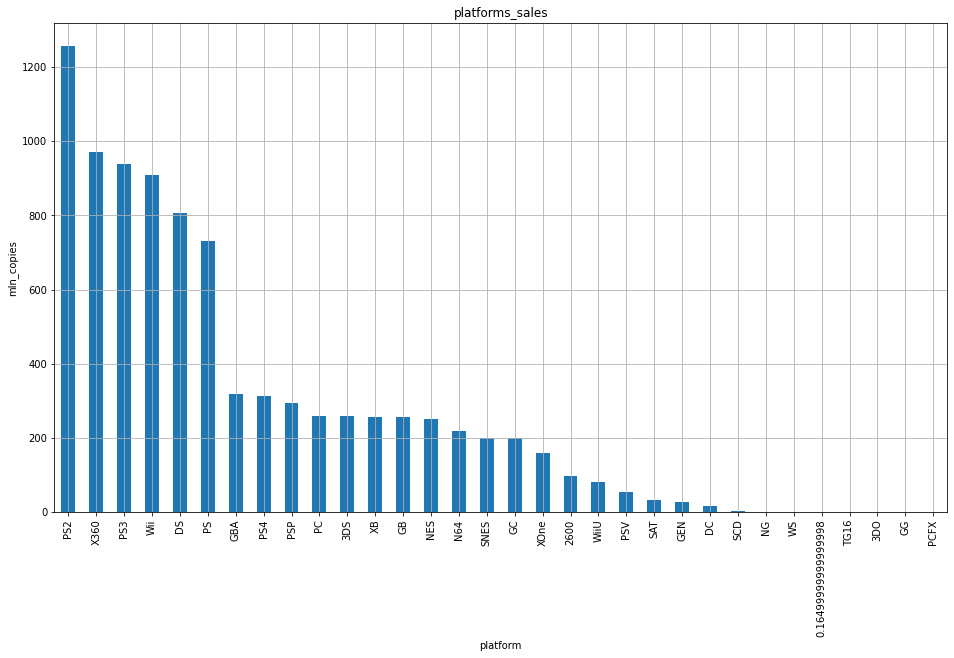

In [50]:
platforms.plot(kind = 'bar',  grid = True, title='platforms_sales', figsize=(16,9))
plt.ylabel('mln_copies');

**Вывод:** 
Наибольшее количество продаж за все годы наблюдается у шести игровых платформ - PS2, X360, PS3, Wii, DS, PS.
Лидером продаж является PS2, второе место у X360.

#### Распределение продаж по годам для популярных за все время платформ

Посмотрим на распределение продаж по годам для PS2. Сгруппируем продажи по годам

In [51]:
ps2 = df.query('platform == "PS2"').pivot_table(index = [
    'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
ps2

,year_of_release,sales
0,2000.0,39.17
1,2001.0,166.43
2,2002.0,205.38
3,2003.0,186.37
4,2004.0,223.82
5,2005.0,166.34
6,2006.0,105.88
7,2007.0,75.99
8,2008.0,53.90
9,2009.0,26.40


Построим график продаж по годам

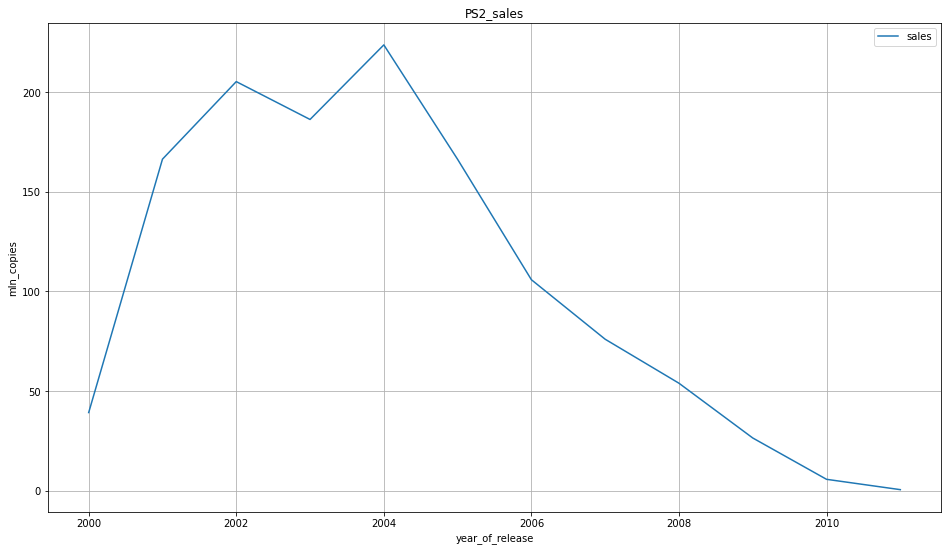

In [52]:
ps2.plot(x = 'year_of_release', y = 'sales', grid = True, title='PS2_sales', figsize=(16,9))
plt.ylabel('mln_copies');

На основании полученных данных можно сделать вывод, что игры на платформе PS2 выпускались с 2000 по 2011 год. Наибольшая популярность игр приходилась на 2001 - 2005 годы. Пик продаж был в 2004 году, затем начался спад и в 2011 игры на данной платформе перестали выпускать. 

Аналогично посмотрим на продажи для X360

In [53]:
x360 = df.query('platform == "X360"').pivot_table(index = [
    'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
x360

,year_of_release,sales
0,2005.0,8.25
1,2006.0,51.62
2,2007.0,95.55
3,2008.0,135.61
4,2009.0,120.29
5,2010.0,179.72
6,2011.0,143.84
7,2012.0,99.74
8,2013.0,88.58
9,2014.0,34.74


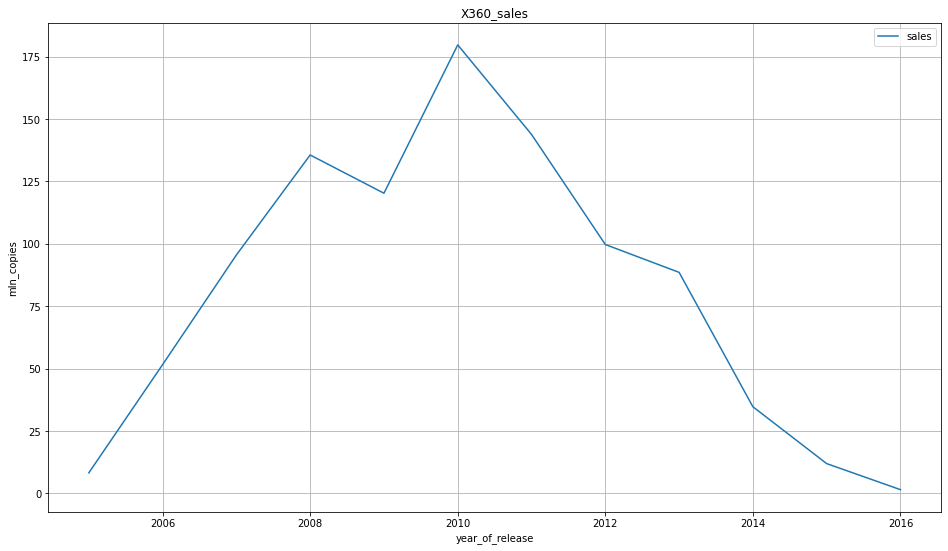

In [54]:
x360.plot(x = 'year_of_release', y = 'sales', grid = True, title='X360_sales', figsize=(16,9))
plt.ylabel('mln_copies');

Игры на платформе X360 выпускались с 2005 по 2016 год (по настоящее время, если представить 2016 и планирование на 2017). Наибольшая популярность игр приходилась на 2008 - 2011 годы. Пик продаж был в 2010 году, затем начался спад.

Посмотрим продажи для PS3

In [55]:
ps3 = df.query('platform == "PS3"').pivot_table(index = [
    'platform', 'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
ps3

,platform,year_of_release,sales
0,PS3,2006.0,20.96
1,PS3,2007.0,73.19
2,PS3,2008.0,118.52
3,PS3,2009.0,130.93
4,PS3,2010.0,146.03
5,PS3,2011.0,161.14
6,PS3,2012.0,107.45
7,PS3,2013.0,113.25
8,PS3,2014.0,47.76
9,PS3,2015.0,16.82


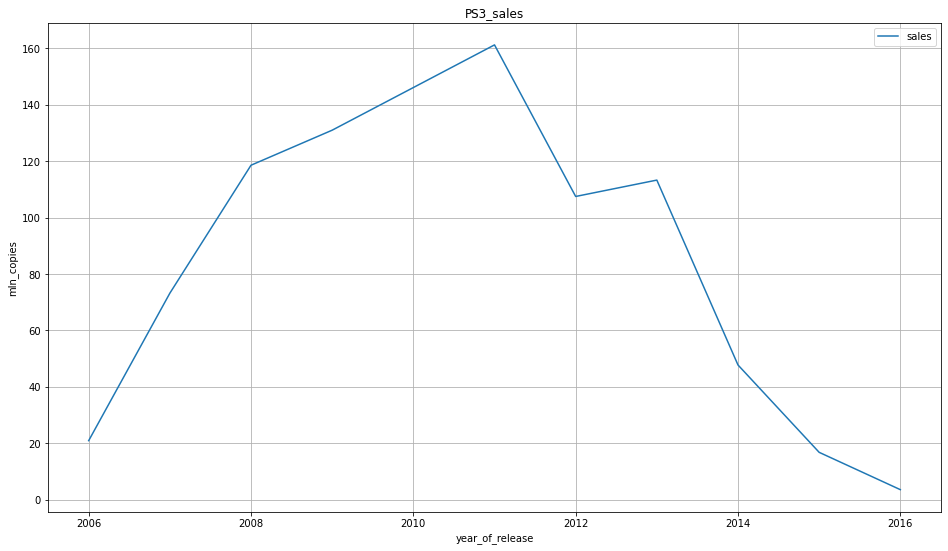

In [56]:
ps3.plot(x = 'year_of_release', y = 'sales', grid = True, title='PS3_sales', figsize=(16,9))
plt.ylabel('mln_copies');

Игры на платформе PS3 выпускались с 2006 по 2016 год. Наибольшая популярность игр приходилась на 2008 - 2013 годы. Пик продаж был в 2011 году, затем начался спад.
Глядя на предыдущий график для X360, можем сказать, что PS2 и X360 были конкурирующими платформами, т.к. игры выпускались в один временной промежуток и были на пике популярности примерно в одно время. 

Посмотрим продажи для платформы Wii

In [57]:
wii = df.query('platform == "Wii"').pivot_table(index = [
    'platform', 'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
wii

,platform,year_of_release,sales
0,Wii,2006.0,137.15
1,Wii,2007.0,152.77
2,Wii,2008.0,171.73
3,Wii,2009.0,222.89
4,Wii,2010.0,127.95
5,Wii,2011.0,59.65
6,Wii,2012.0,21.71
7,Wii,2013.0,8.59
8,Wii,2014.0,3.75
9,Wii,2015.0,1.14


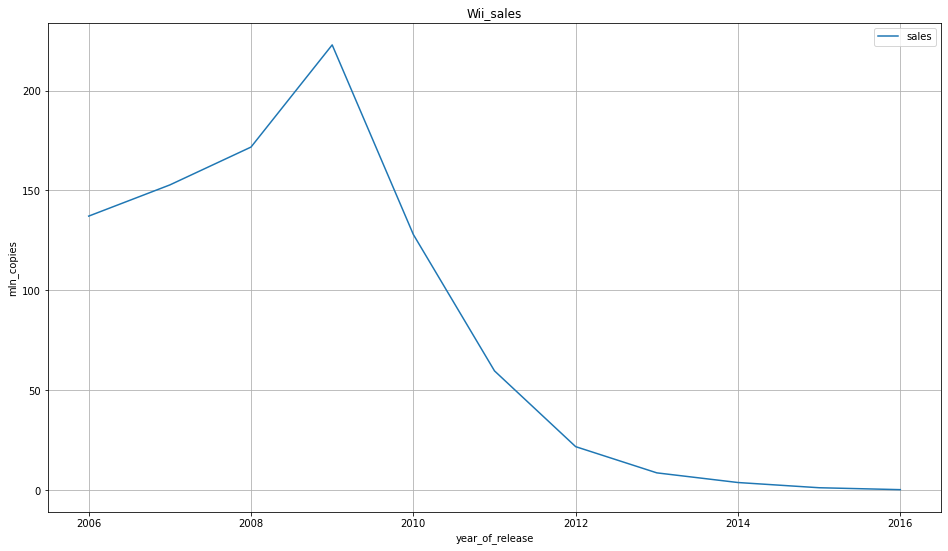

In [58]:
wii.plot(x = 'year_of_release', y = 'sales', grid = True, title='Wii_sales', figsize=(16,9))
plt.ylabel('mln_copies');

Игры на платформе Wii выпускались с 2006 по 2016 год. Наибольшая популярность игр приходилась на 2008 - 2009 годы. Пик продаж был в 2009 году, затем начался спад.

Посмотрим на данные для платформы DS

In [59]:
ds = df.query('platform == "DS"').pivot_table(index = [
    'platform', 'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
ds

,platform,year_of_release,sales
0,DS,1985.0,0.02
1,DS,2004.0,17.27
2,DS,2005.0,130.14
3,DS,2006.0,119.81
4,DS,2007.0,146.97
5,DS,2008.0,148.62
6,DS,2009.0,119.54
7,DS,2010.0,85.02
8,DS,2011.0,26.18
9,DS,2012.0,11.01


В данных присутствует "выбивающийся" 1985 год, посмотрим на эти данные

In [60]:
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15955,Strongest Tokyo University Shogi DS,DS,1985.0,action,0.0,0.0,0.02,0.0,68.0,7.4,RP,0.02


По данным интернета такая игра действительно была выпущена в 1985 на платформе DS в Токио, что объясняет продажи в столбце jp_sales. Построим график

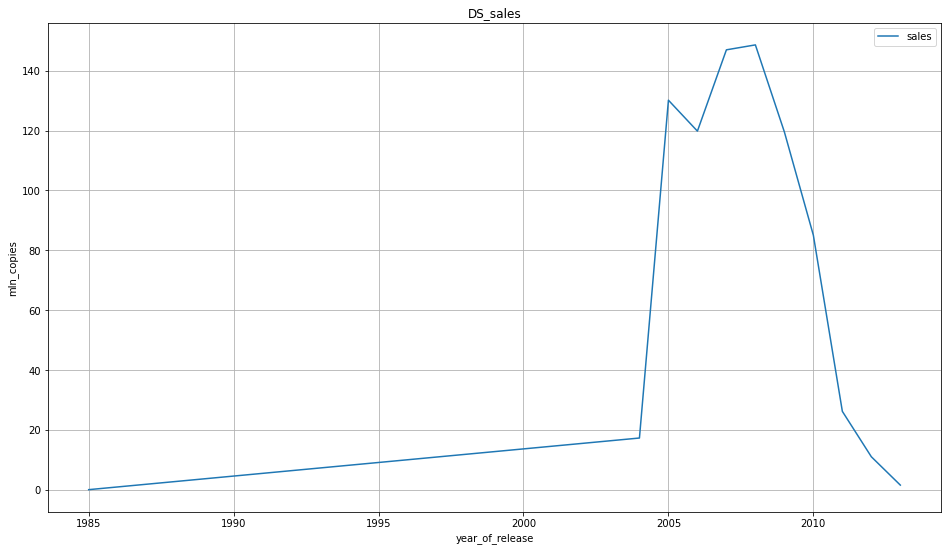

In [61]:
ds.plot(x = 'year_of_release', y = 'sales', grid = True, title='DS_sales', figsize=(16,9))
plt.ylabel('mln_copies');

Игры на платформе DS выпускались с 2004 по 2013 год, при этом в 1985 была выпущена одна игра - Strongest Tokyo University Shogi DS. Наибольшая популярность игр приходилась на 2005 - 2009 годы. Пик продаж был в 2007-2008 году, затем начался спад и в 2013 игры на данной платформе перестали выпускать.

И посмотрим шестую платформу по количеству продаж за все время - PS

In [62]:
ps = df.query('platform == "PS"').pivot_table(index = [
    'platform', 'year_of_release'], values = ['sales'], aggfunc = 'sum').reset_index()
ps

,platform,year_of_release,sales
0,PS,1994.0,6.03
1,PS,1995.0,35.96
2,PS,1996.0,94.70
3,PS,1997.0,136.17
4,PS,1998.0,172.77
5,PS,1999.0,144.53
6,PS,2000.0,96.37
7,PS,2001.0,35.59
8,PS,2002.0,6.67
9,PS,2003.0,2.07


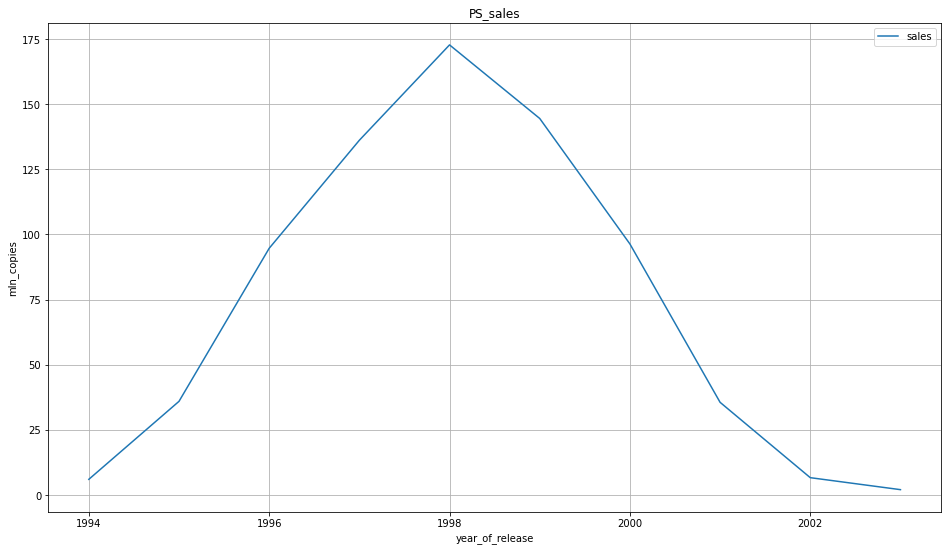

In [63]:
ps.plot(x = 'year_of_release', y = 'sales', grid = True, title='PS_sales', figsize=(16,9))
plt.ylabel('mln_copies');

Игры на платформе PS выпускались с 1994 по 2003 год. Наибольшая популярность игр приходилась на 1997 - 1999 годы. Пик продаж был в 1998 году, затем начался спад и в 2003 игры на данной платформе перестали выпускать.

Выведем данные по шести популярным платформам вместе

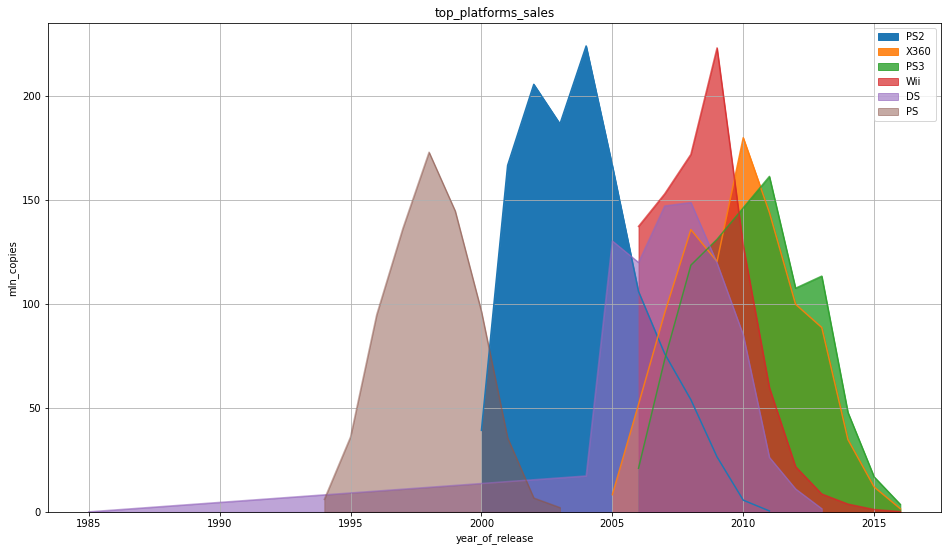

In [64]:
ax = ps2.plot(kind = 'area', x = 'year_of_release', y = 'sales', label='PS2', 
              title = 'top_platforms_sales', figsize=(16,9))

x360.plot(kind = 'area', ax = ax, x = 'year_of_release', y = 'sales', label='X360', alpha = 0.9)

ps3.plot(kind = 'area', ax = ax, x = 'year_of_release', y = 'sales', label='PS3', alpha = 0.8)

wii.plot(kind = 'area', ax = ax, x = 'year_of_release', y = 'sales', label='Wii', alpha = 0.7)

ds.plot(kind = 'area', ax = ax, x = 'year_of_release', y = 'sales', label='DS', alpha = 0.6)

ps.plot(kind = 'area', ax = ax, x = 'year_of_release', y = 'sales', label='PS', alpha = 0.5, grid = True)

plt.ylabel('mln_copies');

**Общий вывод:**
На основании полученных данных можно сказать, что "средняя продолжительность жизни" для игровой платформы - 11 лет. 
Массово игры начали выпускать с 1994, на платформе PS, затем ее сменила PS2, а, начиная с 2005 на смену PS2 пришла PS3 и вместе с ней сразу несколько конкурирующих платформ - Wii, X360 и DS. При этом DS до этого выпускала одну игру в 1985.
В среднем для платформа наиболее популярна 3 года, наибольшую популярность удалось удержать PS3

### Анализ игровых платформ за актуальный период

Для планирования кампании на 2017 год возьмем актуальные данные за последние 3 года, т.е. 2014-2016 годы включительно. Несмотря на то, что  примерная продолжительность жизни игровой платформы 10-11 лет, такой большой период для планирования кампании на 2017 год лучше не брать, т.к. он будет включать устаревшие данные/тренды. 

In [65]:
df_actual = df.query('year_of_release > 2013')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015.0,shooter,6.03,5.86,0.36,2.38,73.0,7.4,RP,14.63
42,Grand Theft Auto V,PS4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,role_playing,4.35,3.49,3.10,0.74,74.0,7.8,RP,11.68
77,FIFA 16,PS4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,shooter,2.99,3.49,0.22,1.28,73.0,7.4,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,66.0,7.6,RP,0.01
16705,Aiyoku no Eustia,PSV,2014.0,misc,0.00,0.00,0.01,0.00,69.0,7.1,RP,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,66.0,7.6,RP,0.01


Посмотрим на популярные платформы 

In [66]:
df_actual.groupby('platform')['sales'].sum().sort_values(ascending = False)

platform
PS4     288.15
XOne    140.36
3DS      86.77
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.66
Wii       5.07
PSP       0.36
Name: sales, dtype: float64

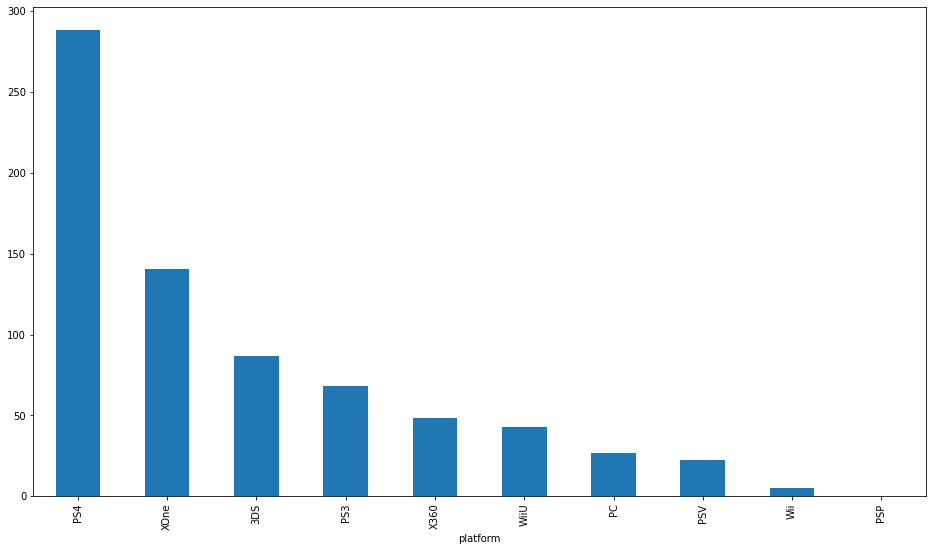

In [67]:
df_actual.groupby('platform')['sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(16,9));

Лидером продаж является PS4, второе место занимает XOne, третье 3DS. Также к списку популярных платформ добавим PS3, т.к. показатели платформы близки к третьему месту. 
Самые непопулярные платформы за 2014-2016 годы - Wii и PSP. Интересно то, что за все время Wii занимает четвертое место по продажам.  

#### PS4

Сделаем срез данных по платформе PS4

In [68]:
ps4_global = df_actual.query('platform == "PS4"')

Построим диаграмму размаха по глобальным продажам игр на основании среза для PS4

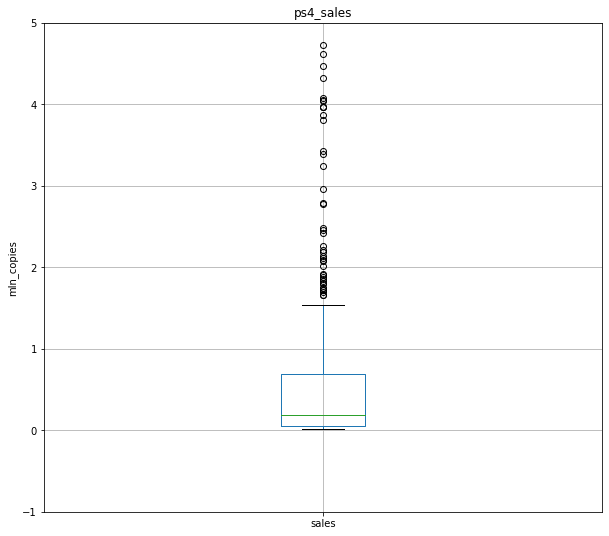

In [69]:
ps4_global.boxplot('sales', figsize=(10,9));
plt.ylim(-1,5)
plt.title('ps4_sales')
plt.ylabel('mln_copies');

Дополнительно посмотрим на квартили, среднее значение и стандартное оклонение с помощью метода describe()

In [70]:
ps4_global['sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sales, dtype: float64

Выведем дисперсию, ее корень является стандартным отклонением, которое мы видим в describe()

In [71]:
np.var(ps4_global['sales'])

2.6011875219273426

**Вывод:**
На основании данных можно сказать, что в основном по миру продается от 0.05 до 0.7 млн копий игры на платформе PS4. Медиана - 0.18 млн копий. При этом среднее значение - 0.77 млн копий возникает из-за "выбросов", где продажи примерно достигают от 1.5 до 14,6 млн копий. 
Стандартное отклонение по выборке для PS4 - 1.61 млн копий

#### XOne

Сделаем срез данных по платформе XOne

In [72]:
xone_global = df_actual.query('platform == "XOne"')

Построим диаграмму размаха по глобальным продажам игр на основании среза для XOne

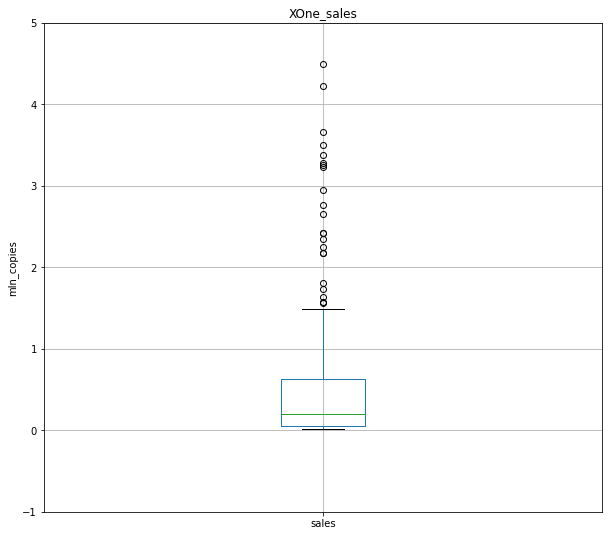

In [73]:
xone_global.boxplot('sales', figsize=(10,9));
plt.ylim(-1,5)
plt.title('XOne_sales')
plt.ylabel('mln_copies');

Посмотрим на квартили, среднее значение и стандартное оклонение с помощью метода describe()

In [74]:
xone_global['sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: sales, dtype: float64

**Вывод:**
Данные по продажам млн копий игры похожи на X360. 
Основной диапазон проданных копий игры на платформе X360 от 0.05 до 0.6 млн. Медиана - 0.2 млн копий. Среднее значение - 0.6 млн копий возникает из-за "выбросов", где продажи примерно достигают от 1.5 до 7,4 млн копий. Стандартное отклонение по выборке для XOne - 1.05 млн копий

#### 3DS

Сделаем срез данных по платформе 3DS

In [75]:
ds3_global = df_actual.query('platform == "3DS"')

На основании среза построим диаграмму размаха по глобальным продажам игр для платформы 3DS

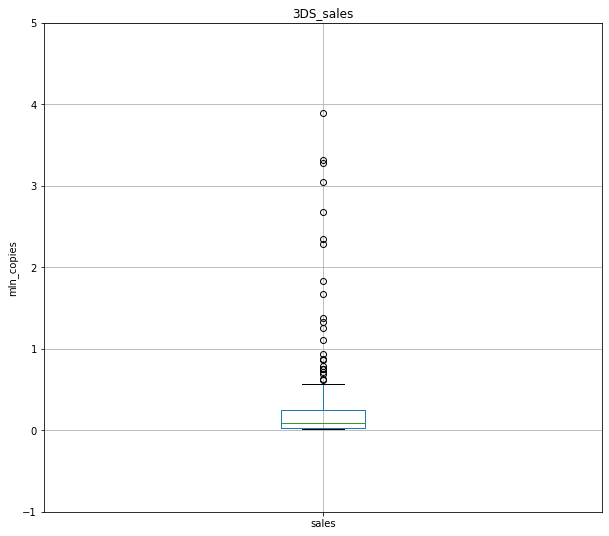

In [76]:
ds3_global.boxplot('sales', figsize=(10,9));
plt.ylim(-1,5)
plt.title('3DS_sales')
plt.ylabel('mln_copies');

Посмотрим на квартили, среднее значение и стандартное оклонение с помощью метода describe()

In [77]:
ds3_global['sales'].describe()

count    213.000000
mean       0.407371
std        1.185763
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: sales, dtype: float64

Для платформы 3DS основной диапазон проданных копий игры от 0.03 до 0.25 млн. Медиана - 0.09 млн копий. Среднее значение - 0.4 млн копий возникает из-за "выбросов", где продажи примерно достигают от 0.6 до 11.7 млн копий. Стандартное отклонение по выборке для 3DS - 1.18 млн копий

#### PS3

Сделаем срез данных по платформе PS3

In [78]:
ps3_global = df_actual.query('platform == "PS3"')

На основании среза построим диаграмму размаха по глобальным продажам игр 

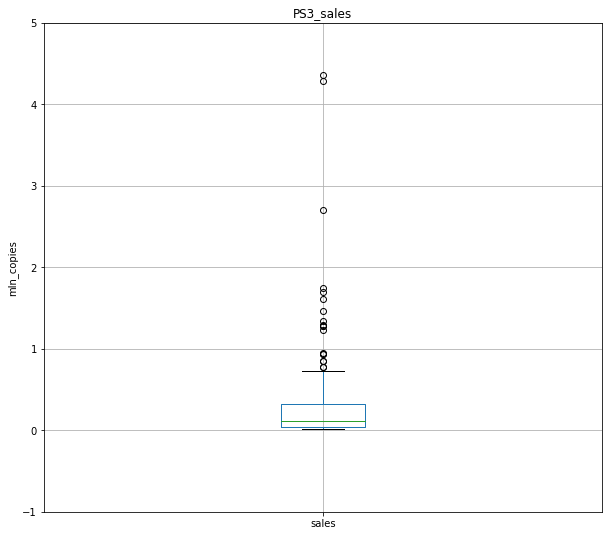

In [79]:
ps3_global.boxplot('sales', figsize=(10,9));
plt.ylim(-1,5)
plt.title('PS3_sales')
plt.ylabel('mln_copies');

Посмотрим на квартили, среднее значение и стандартное оклонение с помощью метода describe()

In [80]:
ps3_global['sales'].describe()

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: sales, dtype: float64

Основной диапазон проданных копий игры на платформе PS3 от 0.04 до 0.3 млн. Медиана - 0.1 млн копий. Среднее значение - 0.3 млн копий возникает из-за продаж от 0.8 до 5.3 млн копий. Стандартное отклонение по выборке для PS3 наименьшее по сравнению с тремя лидерами - 0.63 млн копий

**Общий вывод:**
Для популярных платформ большинство игр преимущественно продаются от 0.05 до 0.6-0.7 млн копий. "Средние платформы" продают от 0.05 до 0.3 млн копий. 
При этом у каждой платформы встречаются популярные игры, которые сильно влияют на среднее значение продаж. 

### Влияние отзывов на продажи

#### PS4

Построим диаграммы рассеяния для выявления зависимости продаж от отзывов критиков и пользователей для платформы PS4

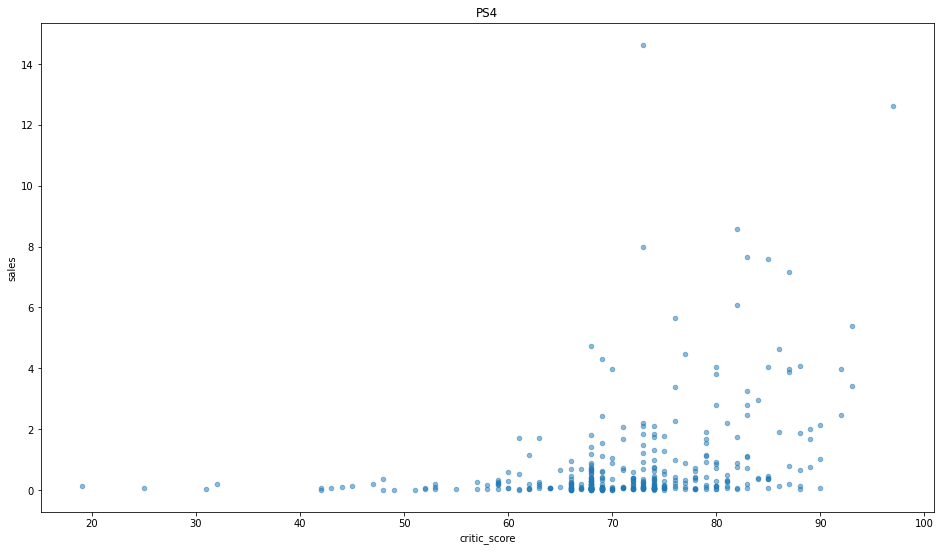

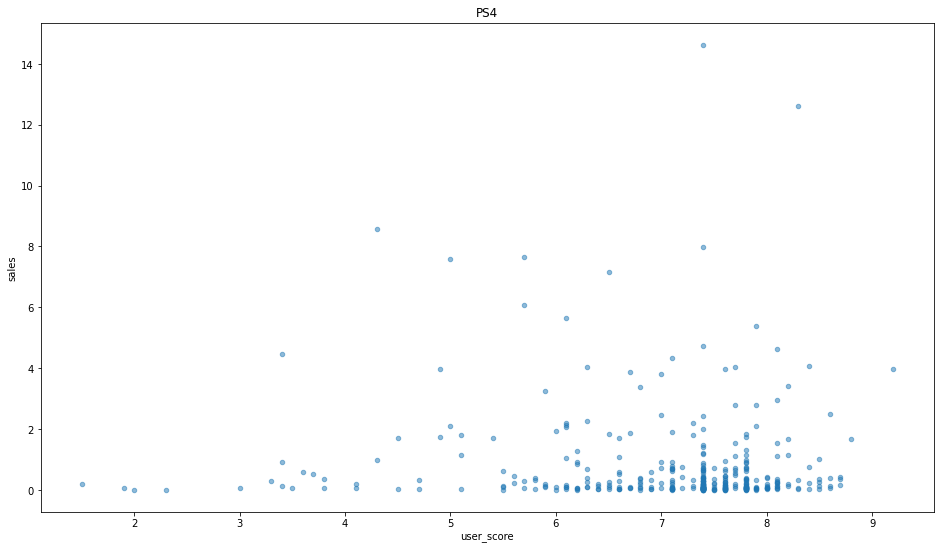

In [81]:
columns = ['critic_score', 'user_score']

for col in columns:
    ps4_global.plot(x=col, y='sales',kind='scatter',figsize=(16,9), alpha=0.5, title = 'PS4');

Посчитаем корреляцию между отзывами и продажами

In [82]:
columns = ['critic_score', 'user_score']

for col in columns:
    print(col, ps4_global['sales'].corr(ps4_global[col]))

critic_score 0.34608941704406565
user_score -0.06709467337892867


**Вывод:**
Для платформы PS4 оценки критиков больше влияют на продажи, чем оценки пользователей. На основании полученных значений корреляции можем сказать, что связь между продажами и оценкой критиков умеренная, ближе к слабой. А связь между оценками пользователей и продажами отсутствует. 

#### XOne

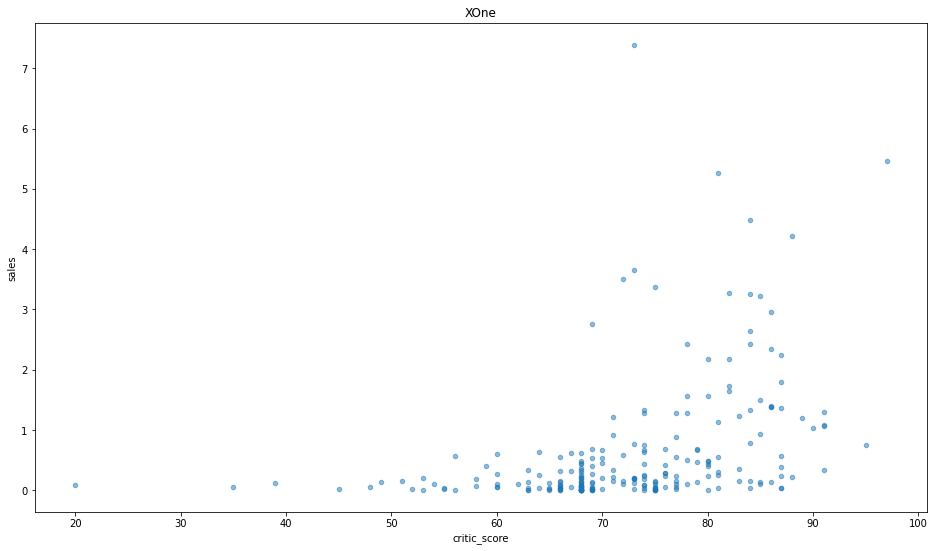

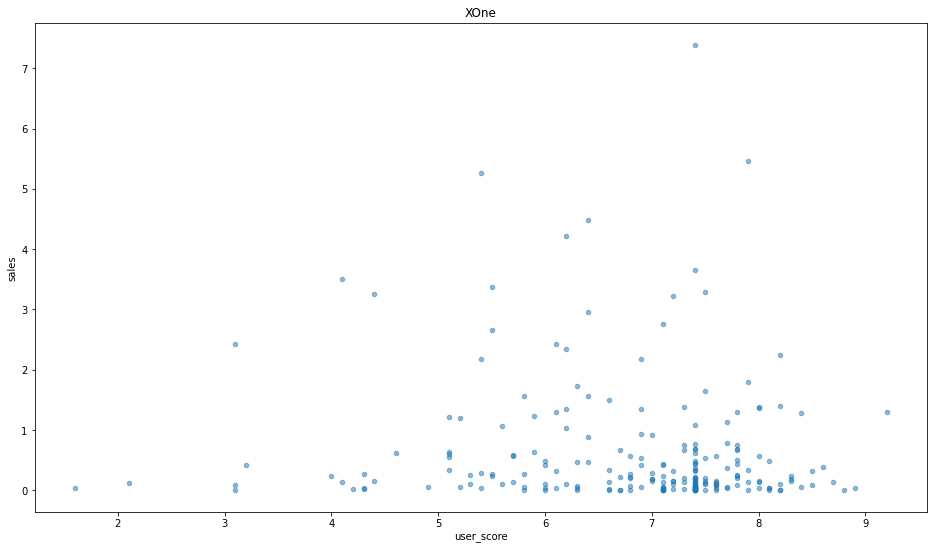

In [83]:
columns = ['critic_score', 'user_score']

for col in columns:
    xone_global.plot(x=col, y='sales',kind='scatter',figsize=(16,9), alpha=0.5, title = 'XOne');

In [84]:
columns = ['critic_score', 'user_score']

for col in columns:
    print(col, xone_global['sales'].corr(xone_global[col]))

critic_score 0.39411082807194947
user_score -0.09853048267615326


**Вывод:**
Для платформы XOne, как и для PS4, оценки критиков больше влияют на продажи, чем оценки пользователей. На основании полученных значений корреляции можем сказать, что связь между продажами и оценкой критиков умеренная, ближе к слабой. А связь между оценками пользователей и продажами отсутствует.

#### 3DS

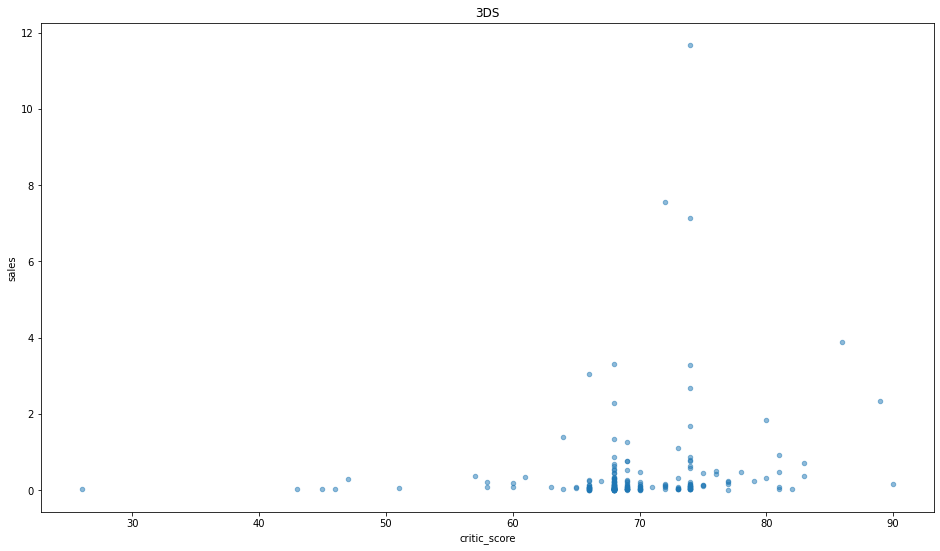

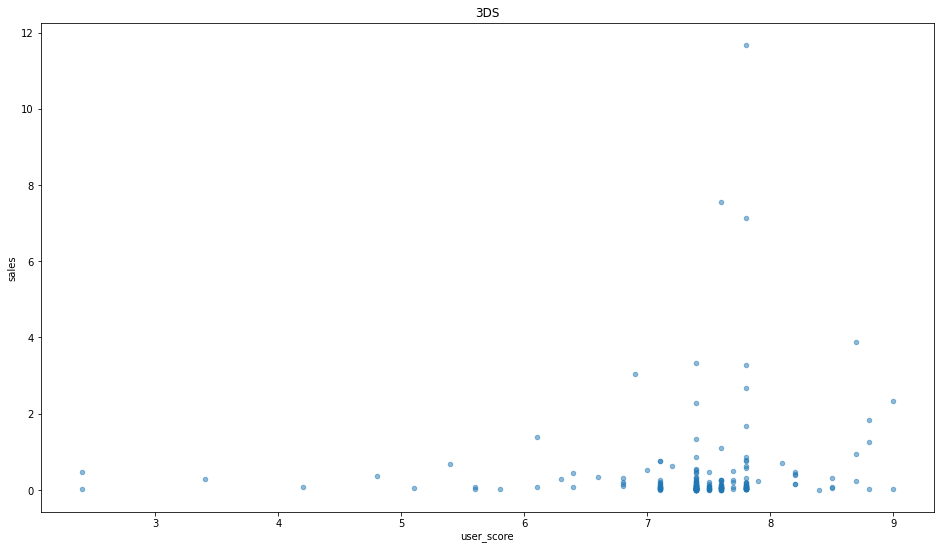

In [85]:
columns = ['critic_score', 'user_score']

for col in columns:
    ds3_global.plot(x=col, y='sales',kind='scatter',figsize=(16,9), alpha=0.5, title = '3DS');

In [86]:
columns = ['critic_score', 'user_score']

for col in columns:
    print(col, ds3_global['sales'].corr(ds3_global[col]))

critic_score 0.1705516281936732
user_score 0.09864537840186405


**Вывод:**
Похоже, что для платформы 3DS оценки критиков и пользователей не сильно влияют на продажи. Для обоих случаев получена низкая корреляция, что означает совсем слабую связь


#### PS3

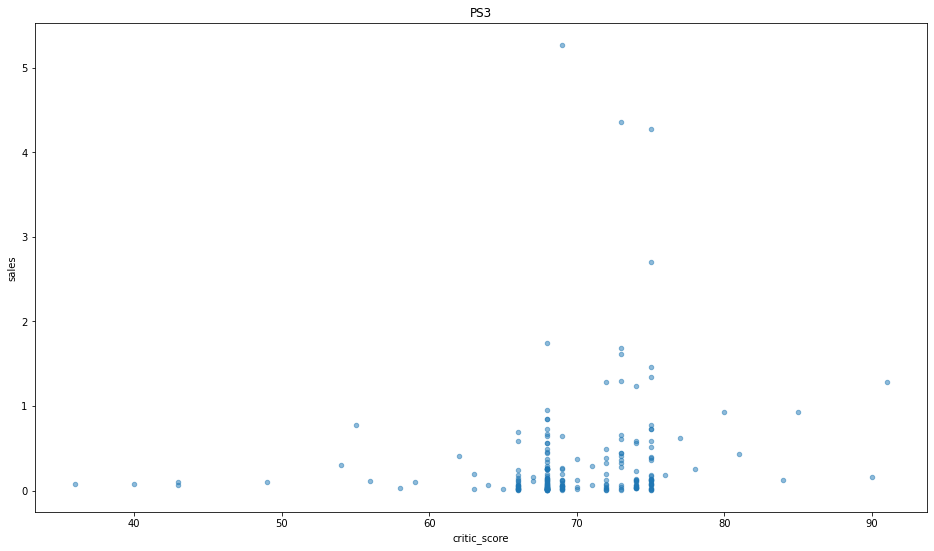

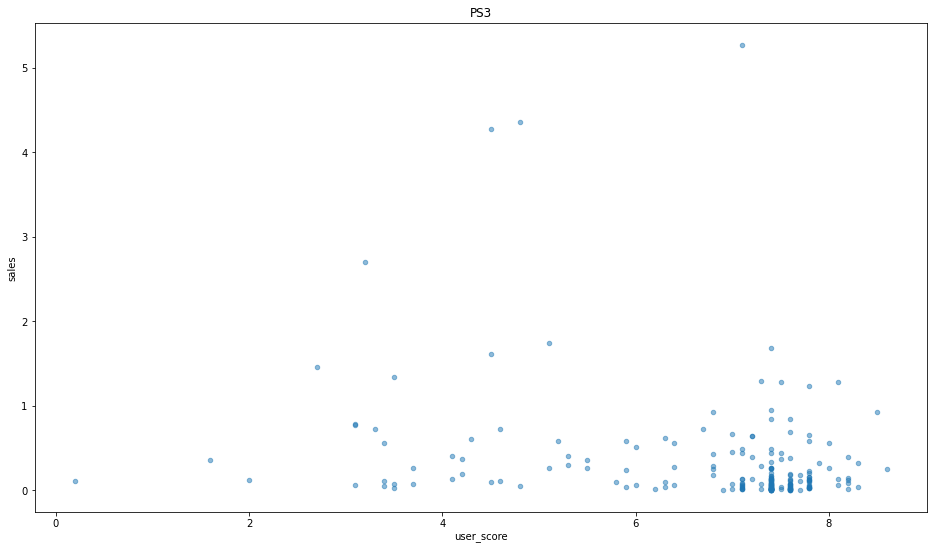

In [87]:
columns = ['critic_score', 'user_score']

for col in columns:
    ps3_global.plot(x=col, y='sales',kind='scatter',figsize=(16,9), alpha=0.5, title = 'PS3');

In [88]:
columns = ['critic_score', 'user_score']

for col in columns:
    print(col, ps3_global['sales'].corr(ps3_global[col]))

critic_score 0.16751972022602285
user_score -0.2492302532380142


**Вывод:**
Для PS3 наблюдается слабая связь между продажами и отзывами критиков, а связь между оценками пользователей и продажами отсутствует

**Общий вывод:**
На основании полученных данных можно сказать, что есть небольшое влияние критиков на продажи двух самых популярных платформ - PS4 и XOne.
Оценки пользователей не влияют на продажи, видимо, тут каждый руководствуется своим мнением и предпочтениями. 

Еще можем предположить, что в тренде определенные платформы и пользователям неважно, какие оценки получает игра. Т.е. пользователи являются адептами какой-либо популярной платформы и просто покупают новые игры на ней

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам

In [89]:
genres = df_actual.groupby('genre')['sales'].sum().sort_values(ascending = False)
genres

genre
action          199.36
shooter         170.94
sports          109.48
role_playing    101.70
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.64
simulation       13.13
strategy          3.96
puzzle            2.21
Name: sales, dtype: float64

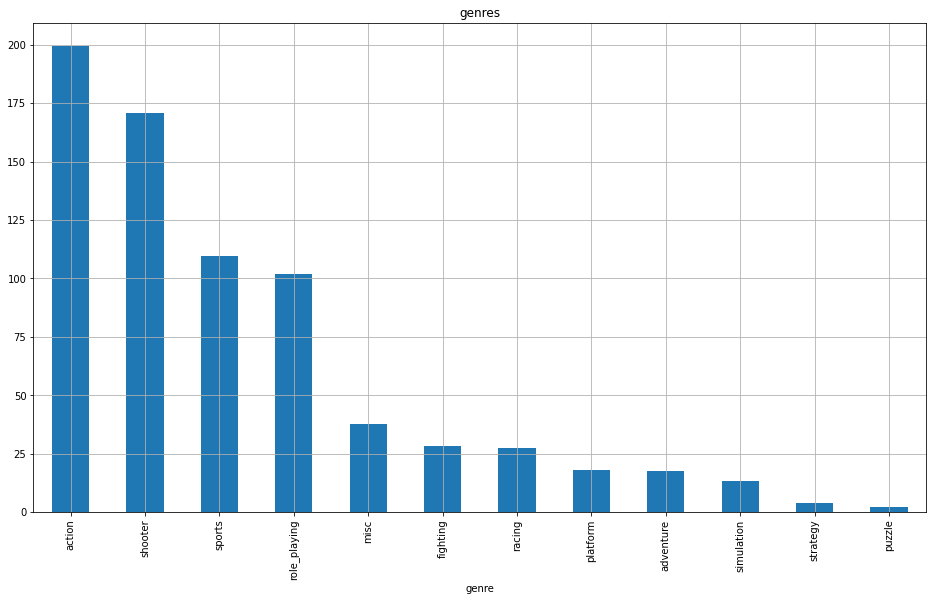

In [90]:
genres.plot(kind='bar', figsize=(16,9), title = 'genres', grid = True);

**Вывод:**
Продажи зависят от жанра игры.

Самым прибыльным жанром является экшен (боевик).
Второе место занимают стрелялки, третье - спортивные игры. 
Четвертое место у ролевых игр, показатели этого жанра близки к спортивным играм. 

Низкие продажи по отношению к популярным жанрам у игр, где нет однозначной определенности к жанру (misc), а также у поединков, гоночных игр, бродилок, приключений/квестов и симуляторов. 

Последние места занимают стратегические игры и пазлы. 

## Портрет пользователя по регионам

### Пользователи в Северной Америке

Посмотрим на топ-5 жанров в Северной Америке

In [91]:
na_genres = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()
na_genres

genre
shooter         79.02
action          72.53
sports          46.13
role_playing    33.58
misc            15.05
Name: na_sales, dtype: float64

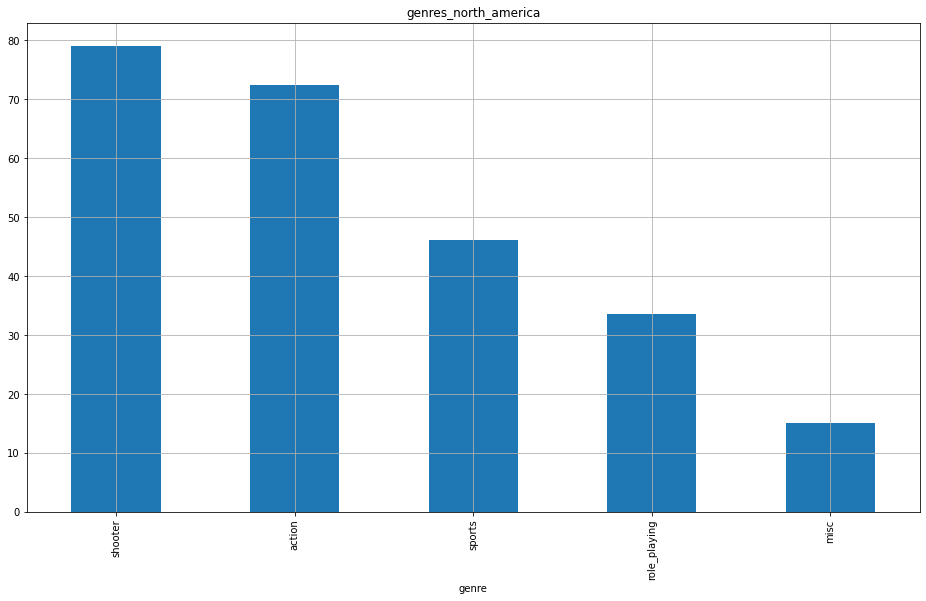

In [92]:
na_genres.plot(kind='bar', grid=True, figsize=(16,9), title='genres_north_america');

**Вывод:**
В Северной Америке самыми популярными являются игры с жанром - стрелялки. Второе место занимает экшен(боевик), этот жанр близок к первому месту, а по всем трем регионам является лидером. Третье место у спортивных игр, четвертое у ролевых. Замыкают пятерку игры, у которых нет однозначного жанра. 

Посмотрим на долю топ-5 платформ в Северной Америке

In [93]:
na_plat = df_actual.groupby('platform')['na_sales'].mean().sort_values(ascending = False).head()
na_plat

platform
XOne    0.356447
WiiU    0.265205
PS4     0.262261
X360    0.254955
Wii     0.189091
Name: na_sales, dtype: float64

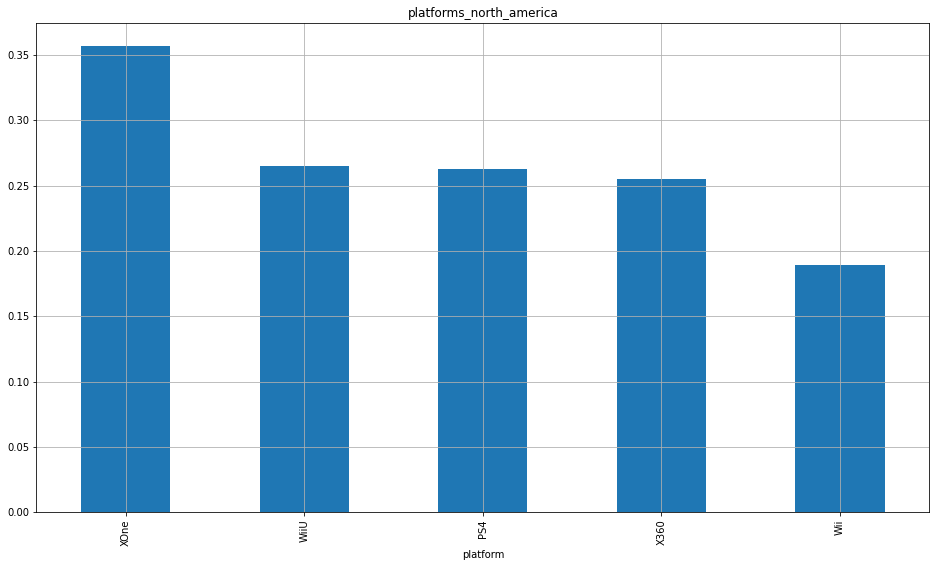

In [94]:
na_plat.plot(kind='bar', grid=True, figsize=(16,9), title='platforms_north_america');

**Вывод:**
Самой популярной платформой в Северной Америке является Xone, второе, третье и четвертое места занимают WiiU, PS4 и X360 соответственно, у них почти одинаковые доли. Пятое место у платформы Wii

### Пользователи в Европе

Посмотрим на топ-5 жанров в Европе

In [95]:
eu_genres = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()
eu_genres

genre
action          74.68
shooter         65.52
sports          45.73
role_playing    28.22
racing          14.13
Name: eu_sales, dtype: float64

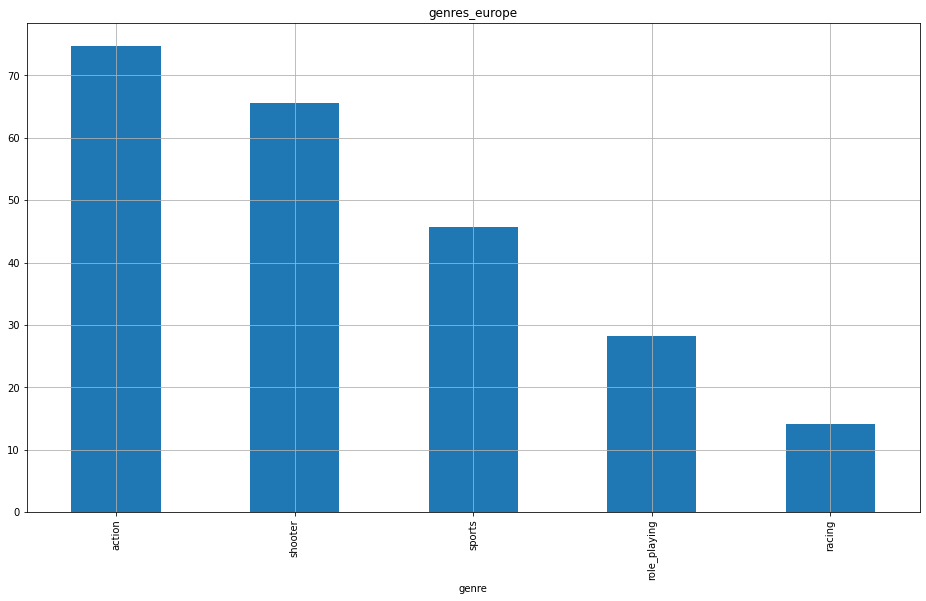

In [96]:
eu_genres.plot(kind='bar', grid=True, figsize=(16,9), title='genres_europe');

**Вывод:**
В Европе, как и во всех регионах, самыми популярными являются игры в жанре экшен (боевик). Второе место занимают стрелялки. Третье и четвертое место, как и в Северной Америке,  у спортивных и ролевых игр соответсвенно. Замыкают пятерку гоночные игры, которые в общем рейтинге жанров находятся на 7 месте и имеют продажи значительно ниже жанров-лидеров.  

Посмотрим на долю топ-5 платформ в Европе

In [97]:
eu_plat = df_actual.groupby('platform')['eu_sales'].mean().sort_values(ascending = False).head()
eu_plat

platform
PS4     0.345851
Wii     0.235455
XOne    0.202851
WiiU    0.180137
X360    0.139550
Name: eu_sales, dtype: float64

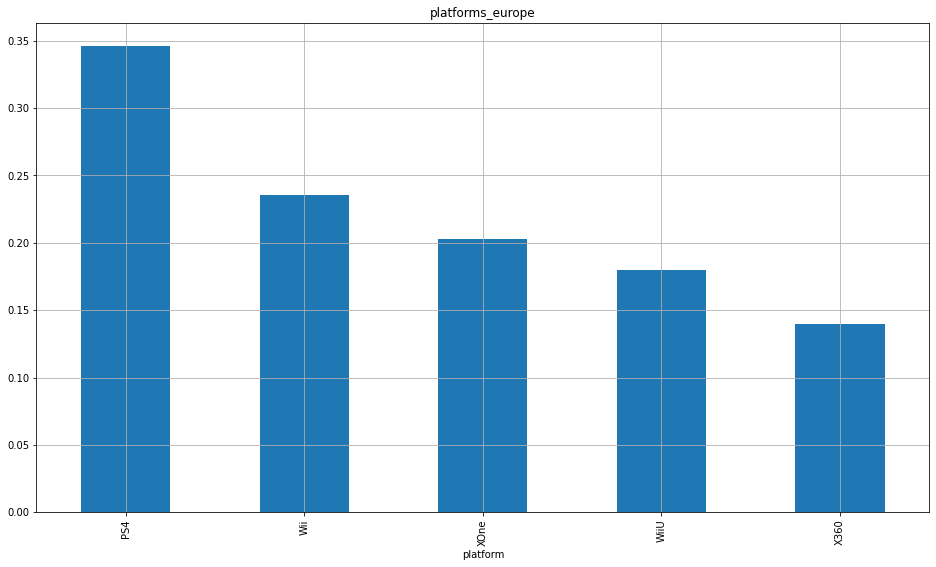

In [98]:
eu_plat.plot(kind='bar', grid=True, figsize=(16,9), title='platforms_europe');

**Вывод:**
Самой популярной платформой в Европе является PS4, при том, что в Северной Америке она третья.
Второе, третье и четвертое места занимают Wii, XOne и WiiU соответственно. Пятое место у платформы X360

### Пользователи в Японии

Посмотрим на топ-5 жанров в Японии

In [99]:
jp_genres = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()
jp_genres

genre
role_playing    31.23
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float64

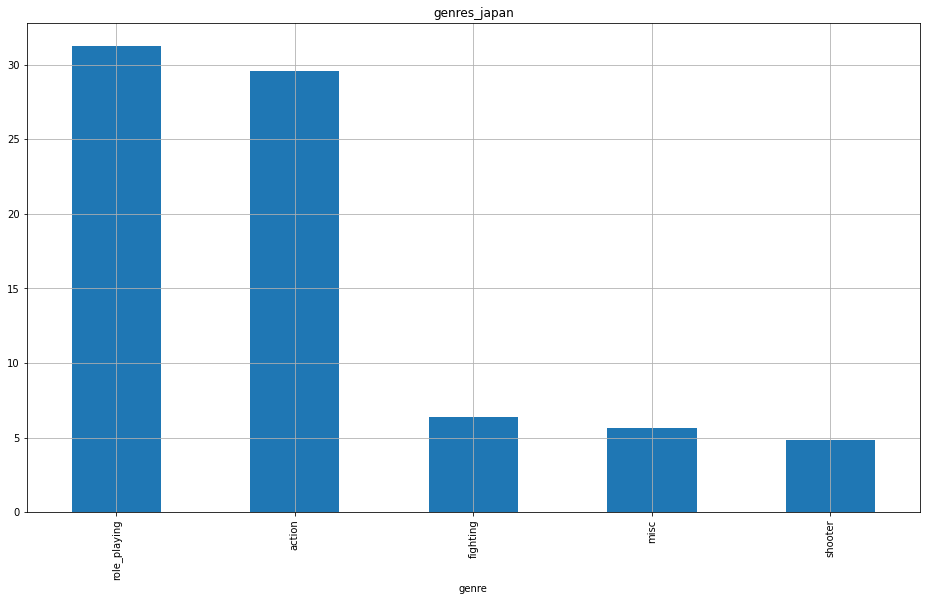

In [100]:
jp_genres.plot(kind='bar', grid=True, figsize=(16,9), title='genres_japan');

**Вывод:**
В Японии самым популярным жанром является ролевая игра, которая занимает четвертое место в Северной Америке и Европе.
Второе место у экшена (боевика).

Третье, четвертое и пятое места разделили примерно с одинаковыми показателями - поединки, игры с разными жанрами и стрелялки. Интересно то, что продажи в этих жанрах сильно ниже двух лидеров. 

Посмотрим на долю топ-5 платформ в Японии

In [101]:
jp_plat = df_actual.groupby('platform')['jp_sales'].mean().sort_values(ascending = False).head()
jp_plat

platform
3DS     0.207700
WiiU    0.100137
PS3     0.051233
PSV     0.049358
PS4     0.039947
Name: jp_sales, dtype: float64

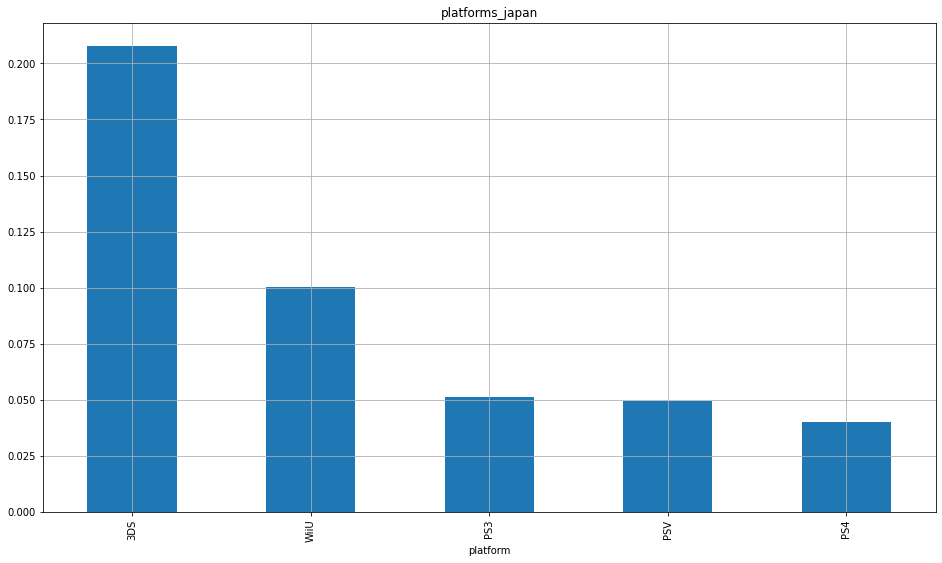

In [102]:
jp_plat.plot(kind='bar', grid=True, figsize=(16,9), title='platforms_japan');

**Вывод:**
По долям платформ Япония отличается от других регионов. На первом месте платформа 3DS, которой нет в топ-5 Северной Америки и Европы, и она в 2 раза популярнее WiiU, занимающей второе место.

Третье, четвертое и пятое места разделили PS3, PSV и PS4 с примерно одинаковыми долями.


**Общий вывод:**
На основании полученных даных можем составить примерный портрет пользователя.

Северная Америка - пользователь предпочитает игры в жанре стрелялок и боевиков на платформе XOne
Европа - пользователь предпочитает игры в жанре боевиков и стрелялок на платформе PS4
Япония - пользователь предпочитает ролевые игры и боевики на платформе 3DS

Несмотря на отличия, можем сказать, что по всех регионах пользователи практически одинаково предпочитают игры в жанре экшен(боевики).
А вот популярные платформы в Японии сильно отличаются от Северной Америки и Европы

### Влияние рейтинга ESRB на продажи в регионах

С помощью диаграмм посмотрим на зависимость продаж от рейтинга ESRB

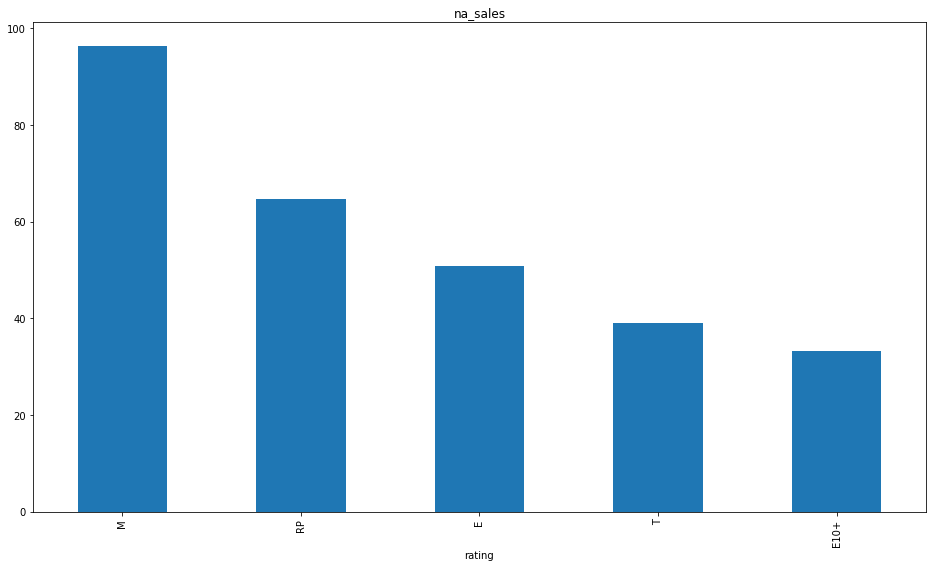

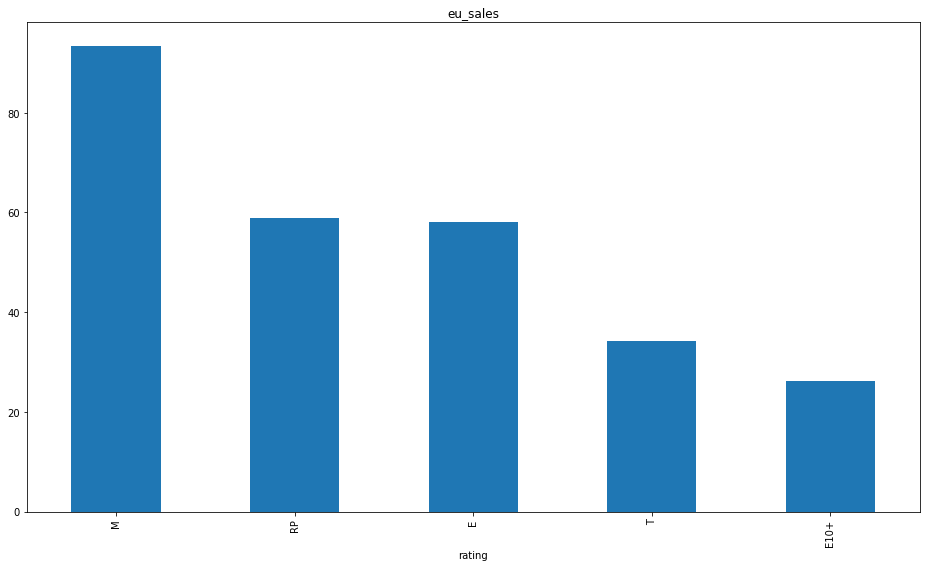

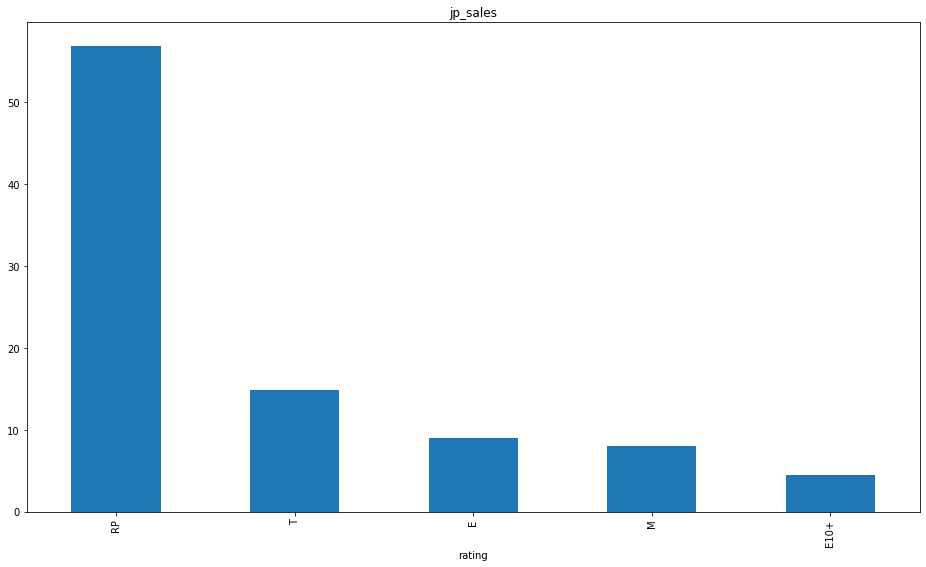

In [103]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

for col in columns:
    rating = df_actual.groupby('rating')[col].sum().sort_values(ascending = False)
    rating.plot(x='rating', y=col, kind='bar', figsize=(16,9), title = col)
    plt.show();

**Общий вывод:**
На основании полученных данных можем сказать, что существует зависимость между продажами и рейтингом ESRB.

Для Северной Америки и Европы зависимость продаж от рейтинга ESRB выглядит практически одинаковой:
- Больше всего продаж у игр с рейтингом M - для взрослых старше 17 лет
- Второе место у рейтинга RP. По нему нельзя определить возрастную категорию, т.к. эта аббревиатура означает, что  продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
- Третье место занимает рейтинг E - для всех (от 6 лет)
- Четвертое и пятое места разделили T - для подростков (от 13 лет) и E10+ - для всех (от 10 лет)

Зависимость продаж от рейтинга в Японии отличается:
- Первое место у RP, где не определена возрастная категория, т.к. игра ожидает присвоения рейтинга
- Второе место у T - для подростков (от 13 лет)
- Третье место у E - для всех (от 6 лет)
- Четвертое место занимают лидеры Северной Америки и Японии - игры с рейтингом M для взрослых старше 17 лет
- Пятое место у E10+ - для всех (от 10 лет)

Можем сказать, что в Северной Америке и Европе больше играют взрослые от 17 лет, в то время как в Японии больше играют подростки от 13 лет

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В качестве нулевой гипотезы говорим, что средние пользовательские рейтинги одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги разные. Т.к. нам необходимо проверить средние рейтинги в двух выборках по платформам, то будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей. В качестве уровня значимости возьмем стандартное значение alpha = 0.05

Перед проверкой гипотезы посмотрим на средние значения пользовательского рейтинга по двум платформам, они выглядят почти одинаковыми

In [104]:
df_actual.query('platform == "XOne" | platform == "PC"').groupby('platform')['user_score'].mean()

platform
PC      6.523841
XOne    6.825439
Name: user_score, dtype: float64

Сделаем выборку по платформе XOne

In [105]:
xone = df_actual.query('platform == "XOne"').reset_index(drop=True)
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,XOne,2015.0,shooter,4.59,2.11,0.01,0.68,73.0,7.4,RP,7.39
1,Grand Theft Auto V,XOne,2014.0,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,Call of Duty: Advanced Warfare,XOne,2014.0,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,Halo 5: Guardians,XOne,2015.0,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
4,Fallout 4,XOne,2015.0,role_playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Sébastien Loeb Rally Evo,XOne,2016.0,racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
224,Rugby Challenge 3,XOne,2016.0,sports,0.00,0.01,0.00,0.00,75.0,6.6,E,0.01
225,ZombiU,XOne,2016.0,action,0.00,0.01,0.00,0.00,68.0,7.4,RP,0.01
226,Prison Architect,XOne,2016.0,action,0.01,0.00,0.00,0.00,74.0,6.7,RP,0.01


И выборку по платформе PC

In [106]:
pc = df_actual.query('platform == "PC"').reset_index(drop=True)
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,The Sims 4,PC,2014.0,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,Fallout 4,PC,2015.0,role_playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
2,Farming Simulator 2015,PC,2014.0,simulation,0.08,1.04,0.0,0.07,70.0,7.5,RP,1.19
3,Grand Theft Auto V,PC,2015.0,action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
4,The Elder Scrolls Online,PC,2014.0,role_playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ride 2,PC,2016.0,racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
147,Rugby World Cup 2015,PC,2015.0,sports,0.00,0.01,0.0,0.00,75.0,1.4,E,0.01
148,Codename: Panzers Complete Collection,PC,2016.0,strategy,0.00,0.01,0.0,0.00,73.0,7.8,RP,0.01
149,The Amazing Spider-Man 2 (2014),PC,2014.0,action,0.00,0.01,0.0,0.00,68.0,7.4,RP,0.01


Применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей.

In [107]:
alpha = 0.05

results = st.ttest_ind(xone['user_score'], pc['user_score'])
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.03929868432092195
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC разные

### Cредние пользовательские рейтинги жанров Action и Sports разные

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (экшен игры) и Sports (спортивные игры) разные. В качестве нулевой гипотезы говорим, что средние пользовательские рейтинги одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги разные. Т.к. нам необходимо проверить средние рейтинги в двух выборках по жанрам, то будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей. В качестве уровня значимости возьмем стандартное значение alpha = 0.05

Перед проверкой гипотезы посмотрим на средние значения пользовательского рейтинга по двум жанрам, они выглядят разными

In [108]:
df_actual.query('genre == "action" | genre == "sports"').groupby('genre')['user_score'].mean()

genre
action    7.093215
sports    5.684472
Name: user_score, dtype: float64

Сделаем выборку по жанру action

In [109]:
action = df_actual.query('genre == "action"').reset_index(drop=True)
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Grand Theft Auto V,PS4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,Grand Theft Auto V,XOne,2014.0,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,The Last of Us,PS4,2014.0,action,1.88,2.00,0.07,0.77,68.0,7.4,RP,4.72
3,Uncharted: The Nathan Drake Collection,PS4,2015.0,action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
4,Watch Dogs,PS4,2014.0,action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...
614,Kyoukai no Shirayuki,PSV,2016.0,action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01
615,Dynasty Warriors: Eiketsuden,PS3,2016.0,action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01
616,Metal Gear Solid V: Ground Zeroes,PC,2014.0,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
617,The Longest 5 Minutes,PSV,2016.0,action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01


Сделаем выборку по жанру sports

In [110]:
sports = df_actual.query('genre == "sports"').reset_index(drop=True)
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,FIFA 16,PS4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,FIFA 17,PS4,2016.0,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,FIFA 15,PS4,2014.0,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
3,FIFA 15,PS3,2014.0,sports,0.58,3.02,0.04,0.64,75.0,4.5,E,4.28
4,NBA 2K16,PS4,2015.0,sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
156,NHL 16,PS3,2015.0,sports,0.00,0.01,0.00,0.00,75.0,7.4,RP,0.01
157,R.B.I. Baseball 2016,PS4,2016.0,sports,0.01,0.00,0.00,0.00,75.0,7.4,RP,0.01
158,Rugby World Cup 2015,PC,2015.0,sports,0.00,0.01,0.00,0.00,75.0,1.4,E,0.01
159,Tour de France 2014,PS3,2014.0,sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01


Применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей.

In [111]:
alpha = 0.05

results = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.274082448980489e-34
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров action и sports разные

## Общий вывод

На основании актуальных данных за 3 года (с 2014 по 2016 включительно) можем сделать следующие выводы:

 - самыми популярными платформами являются PS4, XOne и 3DS. При этом, если ориентироваться на рынок разных регионов, то необходимо учесть, что в каждом регионе своя популярная платформа:
   - PS4 - в Европе
   - XOne - в Северной Америке
   - 3DS - в Японии

- в части жанров все регионы сходятся в больших продажах для экшенов(боевиков). Кроме того в Северной Америке и Европе любят стрелялки и спортивные игры, а в Японии - ролевые игры.

- для регионов характерен возраст игрока. В Северной Америке и Европе больше играют взрослые от 17 лет, а в Японии - подростки от 13 лет. Далее по продажам идут игры для всех от 6 лет, они характерны всем регионам. 

- для популярных платформ преимущественно продается от 0.05 до 0.6-0.7 млн копий игр. При этом бывают очень популярные игры, которые влияют на статистику общих продаж в рамках платформы. 

- есть небольшое влияние критиков на продажи двух самых популярных платформ - PS4 и XOne, а вот зависимости между оценками пользователей и продажами для популярных платформ не наблюдается.

"Средняя продолжительность жизни" для игровой платформы - 11 лет, наиболее прибыльной она является в течение 3х лет. Лидером продаж за все время является платформа PS2, но, учитывая данные по выборке за 2014-2016г, платформа уже устарела. При этом можно сказать, что платформы PlayStation всегда популярны, т.к. в актуальном периоде лидером по всем регионам является PS4, а PS3 находится на четвертом месте. 

Также в ходе работы мы подтвердили две гипотезы о том, что:
- средние пользовательские рейтинги платформ Xbox One и PC разные
- средние пользовательские рейтинги жанров action и sports разные
